# Dependencias

In [9]:
# PyTorch con Soporte CUDA
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [1]:
# Instalando dependencias
!pip install --user pyarrow findspark pyspark tensorflow pandas scikit-learn ydata-profiling matplotlib numpy seaborn opencv-python pillow pydicom scikit-image lime tf-keras-vis numpy xgboost grad-cam easyocr==1.7.2 joblib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 6.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=d12fa4804514776ebd7bfd0f23c2c6fb72fe61061b357f71b9a566ef1c108b5b
  Stored in directory: /Users/clubability/Library/Caches/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam
  Consider adding this directory to PATH or, if you prefer

# Inicializacion

In [5]:
%matplotlib inline

In [6]:
import sys
from pathlib import Path

# Force add the project root to sys.path (adjust as needed)
project_root = Path("../").resolve()  # one level up from /notebooks/
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [11]:
# Calculos
import numpy as np
import pandas as pd

# PyTorch
import torch

# Visualizacion
#from ydata_profiling import ProfileReport #LIBRERIA COMENTADA*

# Utilidades
import os
import re

## Constantes

In [23]:
DATA_ABS_PATH                   = os.path.abspath("../data/CBIS-DDSM")
IMAGES_ABS_PATH                 = os.path.abspath("../data/CBIS-DDSM/CBIS-DDSM")
CLEANED_IMAGES_ABS_PATH         = os.path.abspath("../data/CBIS-DDSM/CLEANED-CBIS-DDSM") # Same as above but in .pgn
TEXT_CLEANED_IMAGES_ABS_PATH    = os.path.abspath("../data/CBIS-DDSM/TEXT-CLEANED-CBIS-DDSM") # Same as above but with text and white borders removed
MASS_CASE_DESCRIPTION_TRAIN_SET = DATA_ABS_PATH + '/mass_case_description_train_set.csv'
MASS_CASE_DESCRIPTION_TEST_SET  = DATA_ABS_PATH + '/mass_case_description_test_set.csv'
CALC_CASE_DESCRIPTION_TRAIN_SET = DATA_ABS_PATH + '/calc_case_description_train_set.csv'
CALC_CASE_DESCRIPTION_TEST_SET  = DATA_ABS_PATH + '/calc_case_description_test_set.csv'
METADATA_CSV                    = DATA_ABS_PATH + '/metadata.csv'

CBISDDSM_DF                     = DATA_ABS_PATH + '/meta/CBIS-DDSM.parquet'
CBISDDSM_FIXED_SET              = DATA_ABS_PATH + '/meta/CBIS-DDSM-fixed.parquet'
OUTPUT_TRAIN                    = DATA_ABS_PATH + '/meta/train_split.parquet'
OUTPUT_VAL                      = DATA_ABS_PATH + '/meta/val_split.parquet'
OUTPUT_TEST                     = DATA_ABS_PATH + '/meta/test_split.parquet'

FEATURES_OUTPUT_PATH            = os.path.abspath("../models/output/features/")
MODELS_OUTPUT_PATH              = os.path.abspath("../models/output/")
MODELS_LOGS_OUTPUT_PATH         = os.path.abspath("../models/logs/")

SKIP_TRAINING                   = False
ENABLE_CLASSIFIERS              = False
INFERENCE_OUTPUT                = os.path.abspath("../output")

LABEL_MAP = {
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 1, # Benigno sin necesidad de mas estudios
    "MALIGNANT": 2
}

## Sesion de Spark

In [7]:
import findspark

from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, BooleanType


findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.appName("breast_cancer_detection").master("local[*]").getOrCreate()
sqlCtx = SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)
spark

### Creacion de DataFrames

In [8]:
metadata_df = spark.read.csv(METADATA_CSV, header=True)
metadata_df.describe()

DataFrame[summary: string, Series UID: string, Collection: string, 3rd Party Analysis: string, Data Description URI: string, Subject ID: string, Study UID: string, Study Description: string, Study Date: string, Series Description: string, Manufacturer: string, Modality: string, SOP Class Name: string, SOP Class UID: string, Number of Images: string, File Size: string, File Size float: string, File Location: string, Download Timestamp: string]

In [9]:
mass_train_df = spark.read.csv(MASS_CASE_DESCRIPTION_TRAIN_SET, header=True, inferSchema=True, multiLine=True, quote='"', escape='"')
mass_train_df.describe()

DataFrame[summary: string, patient_id: string, breast_density: string, left or right breast: string, image view: string, abnormality id: string, abnormality type: string, mass shape: string, mass margins: string, assessment: string, pathology: string, subtlety: string, image file path: string, cropped image file path: string, ROI mask file path: string]

In [10]:
mass_test_df = spark.read.csv(MASS_CASE_DESCRIPTION_TEST_SET, header=True, inferSchema=True, multiLine=True, quote='"', escape='"')
mass_test_df.describe()

DataFrame[summary: string, patient_id: string, breast_density: string, left or right breast: string, image view: string, abnormality id: string, abnormality type: string, mass shape: string, mass margins: string, assessment: string, pathology: string, subtlety: string, image file path: string, cropped image file path: string, ROI mask file path: string]

In [11]:
calc_train_df = spark.read.csv(CALC_CASE_DESCRIPTION_TRAIN_SET, header=True, inferSchema=True, multiLine=True, quote='"', escape='"')
calc_train_df.describe()

DataFrame[summary: string, patient_id: string, breast density: string, left or right breast: string, image view: string, abnormality id: string, abnormality type: string, calc type: string, calc distribution: string, assessment: string, pathology: string, subtlety: string, image file path: string, cropped image file path: string, ROI mask file path: string]

In [12]:
calc_test_df = spark.read.csv(CALC_CASE_DESCRIPTION_TEST_SET, header=True, inferSchema=True, multiLine=True, quote='"', escape='"')
calc_test_df.describe()

DataFrame[summary: string, patient_id: string, breast density: string, left or right breast: string, image view: string, abnormality id: string, abnormality type: string, calc type: string, calc distribution: string, assessment: string, pathology: string, subtlety: string, image file path: string, cropped image file path: string, ROI mask file path: string]

**Nota**: Hay algunas columnas que tienen caracteres especiales, como saltos de linea. Como la columna con la direccion del ROI:

In [13]:
calc_test_df.show(2, truncate=False)

+----------+--------------+--------------------+----------+--------------+----------------+--------------------+-----------------+----------+---------+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|patient_id|breast density|left or right breast|image view|abnormality id|abnormality type|calc type           |calc distribution|assessment|pathology|subtlety|image file path                                                                                                                                                        |cro

Ahora reemplazare los nombres erroneos de las imagenes (000000.dcm) por su nombre real, segun el siguiente patron:

- **image file path**: Aparece con nombre de archivo 000000.dcm, pero todas se llama 1-1.dcm
- **cropped image file path**: Aparece con nombre de archivo 000000.dcm, pero todas se llaman 1-1.dcm y se encuentran en las carpetas con el sufijo _1 (ejemplo: CC_1, MLO_1, etc.)
- **ROI mak file path**: Aparece con nombre de archivo 000000.dcm, pero todas se llaman 1-2.dcm y se encuentra en las carpetas con el sufijo _1

In [14]:
mass_train_df = mass_train_df \
                .withColumn("image_path", F.regexp_replace("image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("cropped_path", F.regexp_replace("cropped image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("roi_path", F.regexp_replace("ROI mask file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("type", F.lit("mass"))

In [15]:
mass_test_df = mass_test_df \
                .withColumn("image_path", F.regexp_replace("image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("cropped_path", F.regexp_replace("cropped image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("roi_path", F.regexp_replace("ROI mask file path", r"/[^/]+$", "/1-2.dcm")) \
                .withColumn("type", F.lit("mass"))

In [16]:
calc_train_df = calc_train_df \
                .withColumn("image_path", F.regexp_replace("image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("cropped_path", F.regexp_replace("cropped image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("roi_path", F.regexp_replace("ROI mask file path", r"/[^/]+$", "/1-2.dcm")) \
                .withColumn("type", F.lit("calc")) \
                .withColumnRenamed("breast density", "breast_density")

In [17]:
calc_test_df = calc_test_df \
                .withColumn("image_path", F.regexp_replace("image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("cropped_path", F.regexp_replace("cropped image file path", r"/[^/]+$", "/1-1.dcm")) \
                .withColumn("roi_path", F.regexp_replace("ROI mask file path", r"/[^/]+$", "/1-2.dcm")) \
                .withColumn("type", F.lit("calc")) \
                .withColumnRenamed("breast density", "breast_density")

In [18]:
mass_train_df.filter(F.col('image_path').isNotNull()).count()

1318

In [19]:
mass_train_df.select(F.col('patient_id')).show(5, truncate=False)

+----------+
|patient_id|
+----------+
|P_00001   |
|P_00001   |
|P_00004   |
|P_00004   |
|P_00004   |
+----------+
only showing top 5 rows



In [20]:
print('mass_train_df image_path null count:', mass_train_df.filter(F.col('image_path').isNotNull()).count())
print('mass_train_df cropped_path null count:', mass_train_df.filter(F.col('cropped_path').isNotNull()).count())
print('mass_train_df roi_path null count:', mass_train_df.filter(F.col('roi_path').isNotNull()).count())
print()
print('mass_test_df image_path null count:', mass_test_df.filter(F.col('image_path').isNotNull()).count())
print('mass_test_df cropped_path null count:', mass_test_df.filter(F.col('cropped_path').isNotNull()).count())
print('mass_test_df roi_path null count:', mass_test_df.filter(F.col('roi_path').isNotNull()).count())
print()
print('calc_train_df image_path null count:', calc_train_df.filter(F.col('image_path').isNotNull()).count())
print('calc_train_df cropped_path null count:', calc_train_df.filter(F.col('cropped_path').isNotNull()).count())
print('calc_train_df roi_path null count:', calc_train_df.filter(F.col('roi_path').isNotNull()).count())
print()
print('calc_test_df cropped_path null count:', calc_test_df.filter(F.col('cropped_path').isNotNull()).count())
print('calc_test_df image_path null count:', calc_test_df.filter(F.col('image_path').isNotNull()).count())
print('calc_test_df roi_path null count:', calc_test_df.filter(F.col('roi_path').isNotNull()).count())

mass_train_df image_path null count: 1318
mass_train_df cropped_path null count: 1318
mass_train_df roi_path null count: 1318

mass_test_df image_path null count: 378
mass_test_df cropped_path null count: 378
mass_test_df roi_path null count: 378

calc_train_df image_path null count: 1546
calc_train_df cropped_path null count: 1546
calc_train_df roi_path null count: 1546

calc_test_df cropped_path null count: 326
calc_test_df image_path null count: 326
calc_test_df roi_path null count: 326


In [21]:
mass_train_df.filter(F.col('cropped_path').isNotNull()).count()

1318

In [22]:
mass_train_df.filter(F.col('roi_path').isNotNull()).count()

1318

In [23]:
mass_train_df.select(F.col('roi_path')).show(4, truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|roi_path                                                                                                                                                                  |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-1.dcm |
|Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/1-1.dcm|
|Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011

In [24]:
mass_train_df.write.mode("overwrite").parquet(DATA_ABS_PATH + '/meta/mass_train.parquet')
mass_test_df.write.mode("overwrite").parquet(DATA_ABS_PATH + '/meta/mass_test.parquet')
calc_train_df.write.mode("overwrite").parquet(DATA_ABS_PATH + '/meta/calc_train.parquet')
calc_test_df.write.mode("overwrite").parquet(DATA_ABS_PATH + '/meta/calc_test.parquet')

# Creacion de Train y Test datasets

Ahora combinare los datasets de test y de train para tener dos unicos datasets para cada fin, asi el modelo aprende tanto de masas como de calcificaciones y si son benignas o malignas.

In [25]:
train_df = mass_train_df.unionByName(calc_train_df, allowMissingColumns=True)
test_df = mass_test_df.unionByName(calc_test_df,  allowMissingColumns=True)

In [26]:
train_df.count()

2864

In [27]:
train_df.filter(F.col('image_path').isNotNull()).count()

2864

In [28]:
train_df.describe()

DataFrame[summary: string, patient_id: string, breast_density: string, left or right breast: string, image view: string, abnormality id: string, abnormality type: string, mass shape: string, mass margins: string, assessment: string, pathology: string, subtlety: string, image file path: string, cropped image file path: string, ROI mask file path: string, image_path: string, cropped_path: string, roi_path: string, type: string, calc type: string, calc distribution: string]

In [29]:
train_df.show(5, truncate=False)

+----------+--------------+--------------------+----------+--------------+----------------+----------------------------------+-------------+----------+---------+--------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------

Ahora solo nos interesa guardas las columnas que puedan aportar informacion valiosa para el entrenamiento, por lo que seleccionaremos las siguientes:
- **image_path**: Ruta hasta la imagen Dicom
- **cropped_path**: Ruta hasta la imagen Dicom recortada
- **roi_path**: Ruta hasta la imagen de Dicom de la region de interes
- **type**: Tipo de imagen (masa o calcificacion)
- **pathology**: Tipo de patologia (Benigna, Beningna sin mas examenes, Maligna)
- **abnormality type**: Tipo de anomalia detectada (masa o calcificacion) (tiene valores nulos)
- **assessment**: Escala de 0-5 que va correlacionada con **pathology**
- **breast_density**: Densidad de las mamas
- **calc distribution**: Distribucion de la calcificacion
- **calc type**: Tipo de la calcificacion
- **mass margins**: Margenes de las masas
- **mass shape**: Forma de las masas
- **image view**: Angulo de vision de la imagen
- **left or right breast**: Lateralidad del seno de la imagen
- **subtlety**: 

In [30]:
columns_to_keep = [
    "image_path",
    "cropped_path",
    "roi_path",
    "abnormality type",
    "assessment",
    "breast_density",
    "calc distribution",
    "calc type",
    "image view",
    "left or right breast",
    "mass margins",
    "mass shape",
    "subtlety",
    "type",
    "pathology" # Label
]

In [31]:
# These are the dataset as publicly available in the TCIA website, however, I'm going to merge them to keep one single dataset
# so I can create my own trainig, validation and test datasets later in the process.
# train_df.select(*columns_to_keep).write.mode("overwrite").parquet(OUTPUT_TRAIN)
# test_df.select(*columns_to_keep).write.mode("overwrite").parquet(OUTPUT_TEST)

full_df = train_df.select(*columns_to_keep).unionByName(test_df.select(*columns_to_keep))
full_df.write.mode("overwrite").parquet(CBISDDSM_DF)

---
# Verificacion de directorios

Dado que estoy cambiando manualmente los nombres de los archivos para que reflejen el nombre correcto descargado por el NBIA Data Retriever, tengo que asegurarme que las nuevas rutas corresponden
a los archivos descargados, por lo que cada una de las rutas tiene que corresponder a un archivo existente en el directorio de las im√°genes.

Para ello, se emplea un script de Pandas que vaya fila a fila por cada ruta y verifique su existencia haciendo uso de .exists()

In [32]:
COLUMNS_TO_CHECK = ["image_path", "cropped_path", "roi_path"]
cbisddsm_df = pd.read_parquet(CBISDDSM_DF)

def check_wrong_paths(df, columns_to_check):
    for col in columns_to_check:
        if col not in cbisddsm_df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
        
        def check_exists(relative_path):
            if not isinstance(relative_path, str):
                return False
            # Normalize and build full path
            normalized = Path(relative_path.replace("/", "\\"))  # Replace backslashes if any
            full_path = (TEXT_CLEANED_IMAGES_ABS_PATH / normalized).resolve()
            return full_path.exists()
    
        cbisddsm_df[f"{col}_exists"] = cbisddsm_df[col].apply(check_exists)
    
    # Print full-width output
    pd.set_option("display.max_colwidth", None)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", None)
    
    print(cbisddsm_df[[*COLUMNS_TO_CHECK, *(f"{col}_exists" for col in COLUMNS_TO_CHECK)]].describe())

In [33]:
check_wrong_paths(cbisddsm_df, COLUMNS_TO_CHECK)

                                                                                                                                                                       image_path  \
count                                                                                                                                                                        3568   
unique                                                                                                                                                                       3103   
top     Calc-Training_P_00112_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.184701927611299861837929775922316557387/1.3.6.1.4.1.9590.100.1.2.329104735012234553414142104453590990063/1-1.dcm   
freq                                                                                                                                                                            7   

                                                                                              

In [34]:
missing_roi = cbisddsm_df[cbisddsm_df["roi_path_exists"] == False]
print(missing_roi[COLUMNS_TO_CHECK + [f"{col}_exists" for col in COLUMNS_TO_CHECK]])

                                                                                                                                                                     image_path  \
0       Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-1.dcm   
1      Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-1.dcm   
2        Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-1.dcm   
3      Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-1.dcm   
4     Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486/1.

## Observaciones

Podemos observar que algunas rutas no existen, esto se debe a que no todos los archivos anteriores siguen el mismo formato, sin embargo, el formato de nombres 1-1.dcm y 1-2.dcm se mantiene luego de revisar los archivos exhaustivamente. Por lo que se corregir√°n los 12 casos anteriores con otro scrip en Pandas.

**Nota**: Se usa Pandas dado que Spark no tiene una funci√≥n para acceder al File System, por lo que crear una UDF que verifique la existencia del archivo ir√≠a en contra del principio distribuido de PySpark, por lo que luego del procesamiento inicial, ya no es necesario.

In [35]:
bad_indexes = missing_roi.index.tolist()

for idx in bad_indexes:
    path = cbisddsm_df.at[idx, "roi_path"]
    if isinstance(path, str):
        cbisddsm_df.at[idx, "roi_path"] = re.sub(r"/[^/]+$", "/1-1.dcm", path)

check_wrong_paths(cbisddsm_df, COLUMNS_TO_CHECK)

                                                                                                                                                                       image_path  \
count                                                                                                                                                                        3568   
unique                                                                                                                                                                       3103   
top     Calc-Training_P_00112_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.184701927611299861837929775922316557387/1.3.6.1.4.1.9590.100.1.2.329104735012234553414142104453590990063/1-1.dcm   
freq                                                                                                                                                                            7   

                                                                                              

## Observaciones

Una vez corregidos los nombres de los archivos, ahora guardamos el dataset corregido para pasar al entrenamiento.

In [36]:
cbisddsm_df.to_parquet(CBISDDSM_FIXED_SET, index=False)

# Observaciones
Luego de corregir los nommbres de todos los archivos dicom en el dataset, ya podemos hacer uso de estos archivos junto con sus etiquetas de patologia, por lo que podemos pasar al a fase de entrenamiento del modelo.

In [37]:
spark.stop()

# Entrenamiento de Modelos

Primero, vamos a confirmar que Jupyter puede ver y usar la GPU. Se espera True y NVIDIA GeForce RTX 3070

In [15]:
#torch.cuda.is_available(), torch.cuda.get_device_name(0)

In [26]:
import uuid
correlation_id = str(uuid.uuid4())

In [27]:
# General
import torch
from pathlib import Path

# Datasets
from datasets.cbisddsm import CBISDDSMDataset

# Models (choose one per run)
from models.resnet import ResNetModel
from models.efficientnet import EfficientNetModel
from models.mobilenet import MobileNetModel

# Training
from training.engine import Trainer
from training.focal_loss import FocalLoss
from training.early_stopping import EarlyStopping
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn

# Visualization
from utils.visualization import (
    plot_training_history,
    save_training_history_to_csv,
    plot_confusion_matrix
)

# Constants
from utils.constants import TEXT_CLEANED_IMAGES_ABS_PATH, LABEL_MAP, MODELS_OUTPUT_PATH

# Torch utils
from torch.utils.data import DataLoader

In [28]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq


# Load full dataset to split
cbisddsm_df = pq.read_table(CBISDDSM_FIXED_SET).to_pandas()
train_df, test_df = train_test_split(cbisddsm_df, test_size=0.2, stratify=cbisddsm_df["pathology"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df["pathology"], random_state=42)

# Save temporary splits
train_df.to_parquet("train.parquet", index=False)
val_df.to_parquet("val.parquet", index=False)
test_df.to_parquet("test.parquet", index=False)

# Visualizacion previa al entrenamiento

Ac√° la idea es validar los datos que se encuentran en los conjuntos de Training, Test y Validaci√≥n.

In [30]:
train_df.drop(['image_path','cropped_path','roi_path'], axis=1)#.profile_report()

abnormality type  assessment  breast_density calc distribution  \
3152             mass           3               1              None   
3098             mass           5               4              None   
269              mass           3               2              None   
3524    calcification           4               2         CLUSTERED   
1074             mass           3               4              None   
...               ...         ...             ...               ...   
3302    calcification           4               3         CLUSTERED   
3416    calcification           4               2         CLUSTERED   
317              mass           3               1              None   
1834    calcification           2               2            LINEAR   
1932    calcification           4               3         CLUSTERED   

                  calc type image view left or right breast   mass margins  \
3152                   None        MLO                RIGHT  CIRCUMSCRIBED   
3098                   None         CC                RIGHT     SPICULATED   
269                    None        MLO                 LEFT  CIRCUMSCRIBED   
3524            PLEOMORPHIC         CC                RIGHT           None   
1074                   None         CC                RIGHT       OBSCURED   
...                     ...        ...                  ...            ...   
3302  PLEOMORPHIC-AMORPHOUS         CC                 LEFT           None   
3416              AMORPHOUS        MLO                RIGHT           None   
317                    None        MLO                RIGHT            N/A   
1834                    N/A        MLO                 LEFT           None   
1932  AMORPHOUS-PLEOMORPHIC        MLO                 LEFT           None   

                    mass shape  subtlety  type  pathology  image_path_exists  \
3152                 LOBULATED         4  mass     BENIGN              False   
3098  ARCHITECTURAL_DISTORTION         2  mass  MALIGNANT              False   
269                       OVAL         4  mass     BENIGN              False   
3524                      None         2  calc     BENIGN              False   
1074                      OVAL         3  mass     BENIGN              False   
...                        ...       ...   ...        ...                ...   
3302                      None         3  calc     BENIGN              False   
3416                      None         4  calc     BENIGN              False   
317   ARCHITECTURAL_DISTORTION         1  mass  MALIGNANT              False   
1834                      None         5  calc     BENIGN              False   
1932                      None         3  calc  MALIGNANT              False   

      cropped_path_exists  roi_path_exists  
3152                False            False  
3098                False            False  
269                 False            False  
3524                False            False  
1074                False            False  
...                   ...              ...  
3302                False            False  
3416                False            False  
317                 False            False  
1834                False            False  
1932                False            False  

[2283 rows x 15 columns]

In [31]:
test_df.drop(['image_path','cropped_path','roi_path'], axis=1)#.profile_report()

abnormality type  assessment  breast_density calc distribution  \
785              mass           3               2              None   
1477    calcification           4               3         CLUSTERED   
2616    calcification           2               3               N/A   
113              mass           5               1              None   
2351    calcification           5               1  CLUSTERED-LINEAR   
...               ...         ...             ...               ...   
1205             mass           4               3              None   
217              mass           4               3              None   
3099             mass           5               3              None   
3                mass           4               3              None   
274              mass           3               1              None   

                              calc type image view left or right breast  \
785                                None        MLO                RIGHT   
1477                        PLEOMORPHIC         CC                 LEFT   
2616  ROUND_AND_REGULAR-LUCENT_CENTERED         CC                RIGHT   
113                                None        MLO                RIGHT   
2351              FINE_LINEAR_BRANCHING        MLO                RIGHT   
...                                 ...        ...                  ...   
1205                               None        MLO                RIGHT   
217                                None        MLO                 LEFT   
3099                               None        MLO                RIGHT   
3                                  None        MLO                 LEFT   
274                                None         CC                RIGHT   

                mass margins                mass shape  subtlety  type  \
785                      N/A  FOCAL_ASYMMETRIC_DENSITY         5  mass   
1477                    None                      None         3  calc   
2616                    None                      None         3  calc   
113           MICROLOBULATED                 LOBULATED         5  mass   
2351                    None                      None         4  calc   
...                      ...                       ...       ...   ...   
1205          MICROLOBULATED                 LOBULATED         5  mass   
217   CIRCUMSCRIBED-OBSCURED                      OVAL         2  mass   
3099              SPICULATED                 IRREGULAR         1  mass   
3                ILL_DEFINED  ARCHITECTURAL_DISTORTION         3  mass   
274            CIRCUMSCRIBED                 LOBULATED         5  mass   

                    pathology  image_path_exists  cropped_path_exists  \
785   BENIGN_WITHOUT_CALLBACK              False                False   
1477                   BENIGN              False                False   
2616  BENIGN_WITHOUT_CALLBACK              False                False   
113                 MALIGNANT              False                False   
2351                MALIGNANT              False                False   
...                       ...                ...                  ...   
1205                MALIGNANT              False                False   
217                    BENIGN              False                False   
3099                MALIGNANT              False                False   
3                      BENIGN              False                False   
274                    BENIGN              False                False   

      roi_path_exists  
785             False  
1477            False  
2616            False  
113             False  
2351            False  
...               ...  
1205            False  
217             False  
3099            False  
3               False  
274             False  

[714 rows x 15 columns]

In [32]:
val_df.drop(['image_path','cropped_path','roi_path'], axis=1)#.profile_report()

abnormality type  assessment  breast_density calc distribution  \
2541    calcification           4               4         CLUSTERED   
1991    calcification           4               4         CLUSTERED   
1615    calcification           2               1         CLUSTERED   
1654    calcification           2               3               N/A   
2835    calcification           5               1            LINEAR   
...               ...         ...             ...               ...   
1268             mass           5               1              None   
1949    calcification           4               3         CLUSTERED   
2517    calcification           5               3         CLUSTERED   
264              mass           5               2              None   
3352    calcification           4               2         CLUSTERED   

               calc type image view left or right breast mass margins  \
2541  PUNCTATE-AMORPHOUS         CC                RIGHT         None   
1991         PLEOMORPHIC         CC                 LEFT         None   
1615  COARSE-PLEOMORPHIC        MLO                RIGHT         None   
1654     VASCULAR-COARSE         CC                 LEFT         None   
2835         PLEOMORPHIC         CC                 LEFT         None   
...                  ...        ...                  ...          ...   
1268                None         CC                RIGHT   SPICULATED   
1949         PLEOMORPHIC         CC                 LEFT         None   
2517         PLEOMORPHIC         CC                RIGHT         None   
264                 None         CC                 LEFT  ILL_DEFINED   
3352         PLEOMORPHIC         CC                RIGHT         None   

                              mass shape  subtlety  type  \
2541                                None         4  calc   
1991                                None         1  calc   
1615                                None         5  calc   
1654                                None         3  calc   
2835                                None         5  calc   
...                                  ...       ...   ...   
1268  IRREGULAR-ARCHITECTURAL_DISTORTION         5  mass   
1949                                None         4  calc   
2517                                None         4  calc   
264                                 OVAL         3  mass   
3352                                None         3  calc   

                    pathology  image_path_exists  cropped_path_exists  \
2541                   BENIGN              False                False   
1991                MALIGNANT              False                False   
1615                   BENIGN              False                False   
1654  BENIGN_WITHOUT_CALLBACK              False                False   
2835                MALIGNANT              False                False   
...                       ...                ...                  ...   
1268                MALIGNANT              False                False   
1949                MALIGNANT              False                False   
2517                MALIGNANT              False                False   
264                 MALIGNANT              False                False   
3352                   BENIGN              False                False   

      roi_path_exists  
2541            False  
1991            False  
1615            False  
1654            False  
2835            False  
...               ...  
1268            False  
1949            False  
2517            False  
264             False  
3352            False  

[571 rows x 15 columns]

In [37]:
import datetime
from sklearn.metrics import confusion_matrix
from utils.visualization import (
    plot_training_history,
    save_training_history_to_csv,
    plot_confusion_matrix
)
from utils.feature_extraction import build_route, extract_features
from training.trainer_config import TrainerConfig, TransformConfig
from models.resnet import ResNetModel
from models.efficientnet import EfficientNetModel
from models.mobilenet import MobileNetModel
from models.base_model import BaseModel
from models.classifiers.svm_classifier import SVMClassifier
#from models.classifiers.xgboost_classifier import XGBoostClassifier
from models.classifiers.base_classifier import BaseClassifier
from torchvision import transforms

results = []

configs = {
    #"ResNet50": TrainerConfig(
        #model_name="ResNet50",
        #dropout_rate=0.5,
        #freeze_base=False,
        #transforms=TransformConfig(
            #use_augmentations=True,
            #resize=224,
            #horizontal_flip_prob=0.5,
            #rotation_degrees=10,
            #translate=0.05,
            #scale_min=0.95,
            #scale_max=1.05,
            #brightness=0.2,
            #contrast=0.2,
            #blur_sigma_min=0.3,
            #blur_sigma_max=1.2,
            #normalize_mean=0.5,
            #normalize_std=0.5
        #)
    #),
    # "EfficientNetB0": TrainerConfig(
    #     model_name="EfficientNetB0",
    #     dropout_rate=0.5,
    #     freeze_base=False,
    #     transforms=TransformConfig(
    #         use_augmentations=True,
    #         resize=224,
    #         horizontal_flip_prob=0.5,
    #         rotation_degrees=10,
    #         translate=0.05,
    #         scale_min=0.95,
    #         scale_max=1.05,
    #         brightness=0.2,
    #         contrast=0.2,
    #         blur_sigma_min=0.3,
    #         blur_sigma_max=1.2,
    #         normalize_mean=0.5,
    #         normalize_std=0.5
    #     )
    # ),
    # "MobileNetV3": TrainerConfig(
    #     model_name="MobileNetV3",
    #     dropout_rate=0.5,
    #     freeze_base=False,
    #     transforms=TransformConfig(
    #         use_augmentations=True,
    #         resize=224,
    #         horizontal_flip_prob=0.5,
    #         rotation_degrees=10,
    #         translate=0.05,
    #         scale_min=0.95,
    #         scale_max=1.05,
    #         brightness=0.2,
    #         contrast=0.2,
    #         blur_sigma_min=0.3,
    #         blur_sigma_max=1.2,
    #         normalize_mean=0.5,
    #         normalize_std=0.5
    #     )
    # ),
    "SVM": TrainerConfig(
        model_name="SVM",
        dropout_rate=0.0,
        freeze_base=True,
    ),
    #"XGBoost": TrainerConfig(
    #    model_name="XGBoost",
    #    dropout_rate=0.0,
    #    freeze_base=True,
    #),
}

strategy_classes = {
    #"ResNet50": ResNetModel,
    #"EfficientNetB0": EfficientNetModel,
    #"MobileNetV3": MobileNetModel,
    "SVM": SVMClassifier,
    #"XGBoost": XGBoostClassifier
}

strategies = {
    name: strategy_classes[name](config=configs[name], search_hyperparameters=True)
    if name in ["SVM"] else strategy_classes[name](config=configs[name])
    for name in configs.keys()
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

COLORMAPS = {
    "image": "Purples",
    "cropped": "Greens",
    "roi": "Oranges"
}

In [38]:
def load_or_extract_features(df, split: str, base_dir: str):
    """
    Load feature `.parquet` if it exists, otherwise compute and save it.

    Args:
        df (pd.DataFrame): The base dataframe with image paths.
        split (str): One of 'train', 'val', 'test'.
        base_dir (str): Directory where feature parquet files are stored.

    Returns:
        pd.DataFrame: DataFrame with extracted features.
    """
    feature_path = os.path.join(base_dir, f"{split}_features.parquet")

    if os.path.exists(feature_path):
        print(f"[INFO] Loading precomputed features for '{split}' from: {feature_path}")
        return pd.read_parquet(feature_path)

    print(f"[INFO] Extracting features for '{split}' (not cached)...")
    df = build_route(df, images_base_path=IMAGES_ABS_PATH)
    df = extract_features(df)
    df.to_parquet(feature_path, index=False)
    print(f"[INFO] Saved features to {feature_path}")
    return df

In [43]:
train_df = load_or_extract_features(train_df, "train", FEATURES_OUTPUT_PATH)
val_df   = load_or_extract_features(val_df, "val", FEATURES_OUTPUT_PATH)
test_df  = load_or_extract_features(test_df, "test", FEATURES_OUTPUT_PATH)

[INFO] Extracting features for 'train_dicom' (not cached)...


Extracting features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2283/2283 [04:38<00:00,  8.19it/s]


[INFO] Saved features to /Users/clubability/Documents/GitHub/breast_cancer_detection/models/output/features/train_dicom_features.parquet
[INFO] Extracting features for 'val_dicom' (not cached)...


Extracting features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 571/571 [01:09<00:00,  8.23it/s]

[INFO] Saved features to /Users/clubability/Documents/GitHub/breast_cancer_detection/models/output/features/val_dicom_features.parquet



==== Training SVM ====
Performing GridSearchCV for SVM hyperparameter tuning...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best hyperparameters found:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy (CV): 0.6478
Classifier model saved to: /Users/clubability/Documents/GitHub/breast_cancer_detection/models/output/3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7/svm_3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7.pkl
Classifier model loaded from: /Users/clubability/Documents/GitHub/breast_cancer_detection/models/output/3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7/svm_3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7.pkl

==== Evaluation for SVM ====
Validation:
Accuracy: 0.5827
Precision: 0.5856
Recall: 0.6204
F1_score: 0.5978
Auc_roc: 0.7767
Test:
Accuracy: 0.5771
Precision: 0.5798
Recall: 0.6180
F1_score: 0.5917
Auc_roc: 0.7946


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.8865 | Val Loss: 0.8395 | Val Acc: 0.4431 | Recall: 0.3775 | Precision: 0.4270 | F1: 0.3622 | AUC: 0.6284 | Time: 277.06s | Max Mem: 6113.42 MB

Epoch 2/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.8454 | Val Loss: 0.7949 | Val Acc: 0.4904 | Recall: 0.4991 | Precision: 0.4912 | F1: 0.4943 | AUC: 0.6853 | Time: 271.43s | Max Mem: 6113.42 MB

Epoch 3/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.7918 | Val Loss: 0.7246 | Val Acc: 0.5236 | Recall: 0.5940 | Precision: 0.5414 | F1: 0.5207 | AUC: 0.7241 | Time: 285.17s | Max Mem: 6113.42 MB

Epoch 4/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.7344 | Val Loss: 0.6832 | Val Acc: 0.5026 | Recall: 0.5735 | Precision: 0.5139 | F1: 0.5013 | AUC: 0.7359 | Time: 289.51s | Max Mem: 6113.42 MB

Epoch 5/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6947 | Val Loss: 0.6359 | Val Acc: 0.5289 | Recall: 0.5854 | Precision: 0.5247 | F1: 0.5340 | AUC: 0.7460 | Time: 277.06s | Max Mem: 6113.42 MB

Epoch 6/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6507 | Val Loss: 0.6363 | Val Acc: 0.4921 | Recall: 0.5721 | Precision: 0.5159 | F1: 0.4943 | AUC: 0.7546 | Time: 275.54s | Max Mem: 6113.42 MB

Epoch 7/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6226 | Val Loss: 0.6066 | Val Acc: 0.5254 | Recall: 0.5912 | Precision: 0.5354 | F1: 0.5319 | AUC: 0.7604 | Time: 286.65s | Max Mem: 6113.42 MB

Epoch 8/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6191 | Val Loss: 0.5993 | Val Acc: 0.5201 | Recall: 0.5932 | Precision: 0.5254 | F1: 0.5285 | AUC: 0.7610 | Time: 286.90s | Max Mem: 6113.42 MB
Early stopping triggered at epoch 8 (no improvement in val_recall).
Best model saved to: D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\efficientnetb0_5128832b-2804-41fd-bb29-19d51fdd8005.pth (val_recall: 0.59%)
Model loaded from: D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\efficientnetb0_5128832b-2804-41fd-bb29-19d51fdd8005.pth


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

Training history (global metrics) saved to D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\efficientnetb0_5128832b-2804-41fd-bb29-19d51fdd8005_history.csv
Per-view metrics saved to D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\efficientnetb0_5128832b-2804-41fd-bb29-19d51fdd8005_history_views.csv


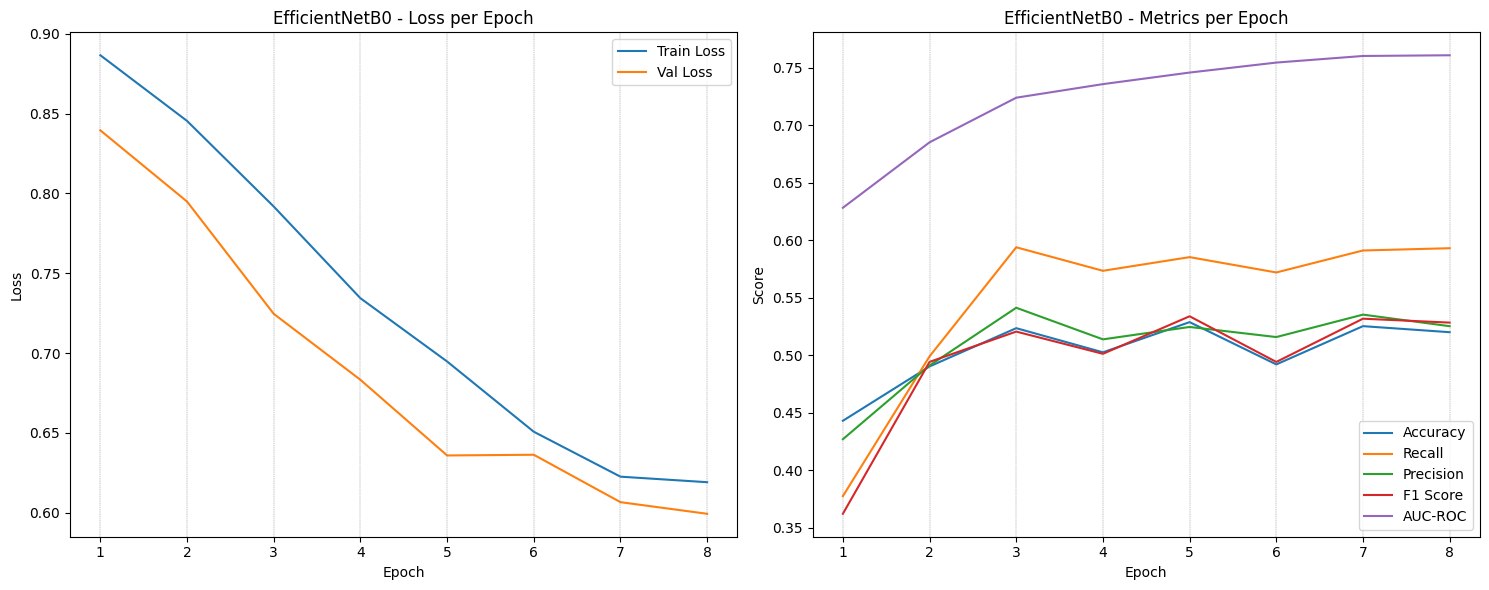

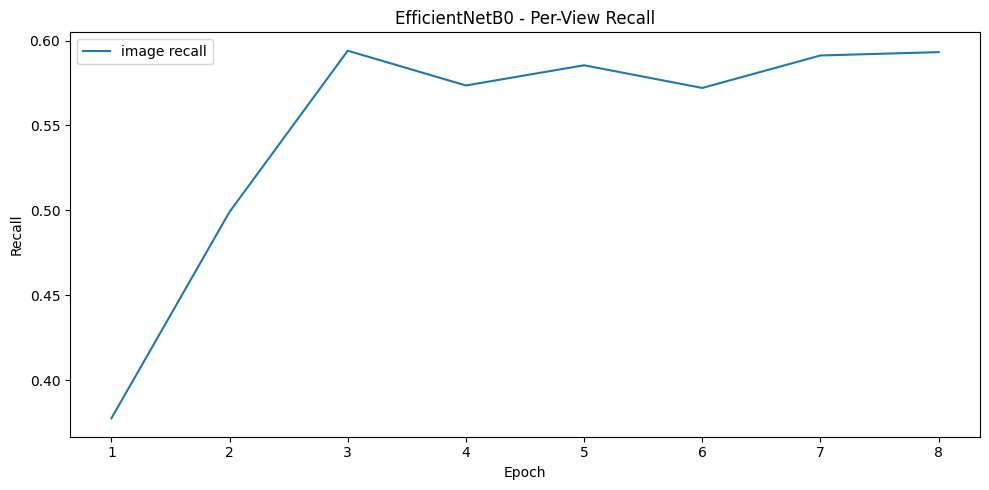

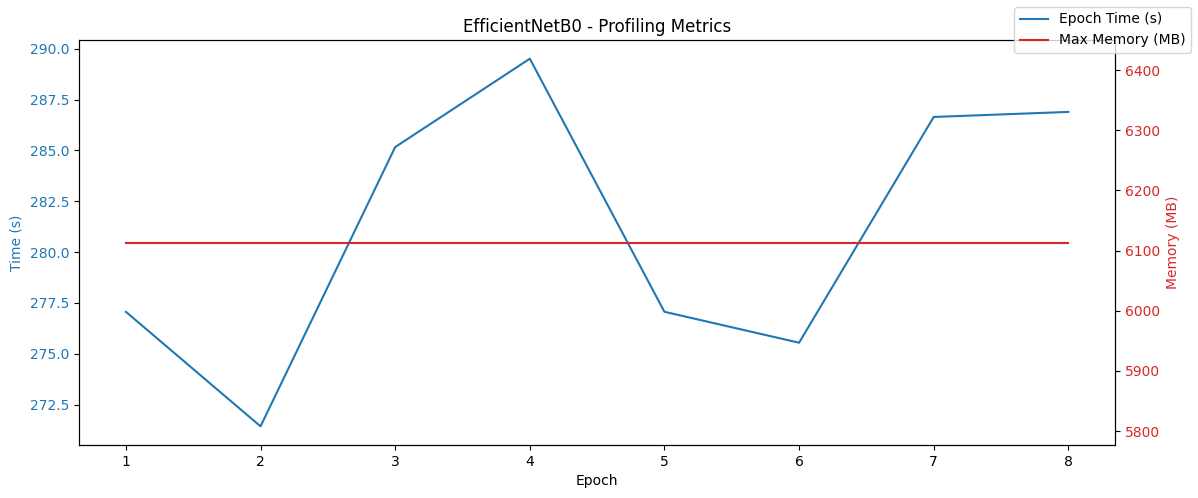

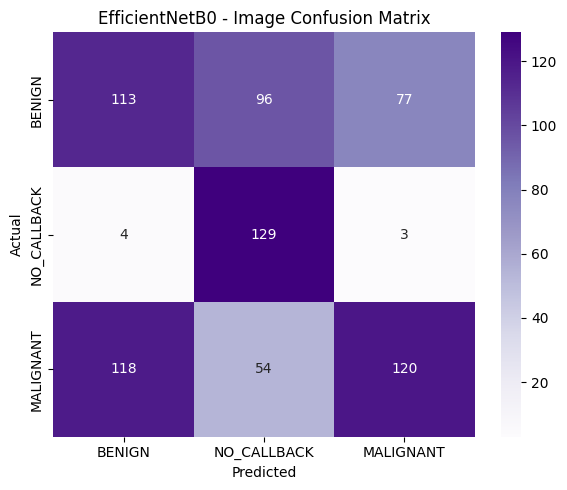


==== Training MobileNetV3 ====

Epoch 1/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.8970 | Val Loss: 0.8888 | Val Acc: 0.3940 | Recall: 0.3306 | Precision: 0.3113 | F1: 0.2122 | AUC: 0.5468 | Time: 296.06s | Max Mem: 1144.71 MB

Epoch 2/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.8173 | Val Loss: 0.8749 | Val Acc: 0.4011 | Recall: 0.3395 | Precision: 0.4291 | F1: 0.2348 | AUC: 0.5827 | Time: 267.26s | Max Mem: 1144.71 MB

Epoch 3/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.7645 | Val Loss: 0.8480 | Val Acc: 0.4028 | Recall: 0.3521 | Precision: 0.4198 | F1: 0.2664 | AUC: 0.6238 | Time: 271.53s | Max Mem: 1144.71 MB

Epoch 4/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.7134 | Val Loss: 0.8203 | Val Acc: 0.4098 | Recall: 0.3592 | Precision: 0.4249 | F1: 0.2987 | AUC: 0.6564 | Time: 261.04s | Max Mem: 1144.71 MB

Epoch 5/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6938 | Val Loss: 0.7769 | Val Acc: 0.4466 | Recall: 0.4035 | Precision: 0.4730 | F1: 0.3794 | AUC: 0.6845 | Time: 262.89s | Max Mem: 1144.71 MB

Epoch 6/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6787 | Val Loss: 0.7404 | Val Acc: 0.4694 | Recall: 0.4411 | Precision: 0.4942 | F1: 0.4380 | AUC: 0.6993 | Time: 264.80s | Max Mem: 1144.71 MB

Epoch 7/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6429 | Val Loss: 0.7144 | Val Acc: 0.4746 | Recall: 0.4567 | Precision: 0.5008 | F1: 0.4538 | AUC: 0.7108 | Time: 263.64s | Max Mem: 1144.71 MB

Epoch 8/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6473 | Val Loss: 0.6622 | Val Acc: 0.5289 | Recall: 0.5444 | Precision: 0.5356 | F1: 0.5343 | AUC: 0.7319 | Time: 264.16s | Max Mem: 1144.71 MB

Epoch 9/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6309 | Val Loss: 0.6402 | Val Acc: 0.5709 | Recall: 0.5895 | Precision: 0.5700 | F1: 0.5768 | AUC: 0.7487 | Time: 261.26s | Max Mem: 1144.71 MB

Epoch 10/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6152 | Val Loss: 0.6441 | Val Acc: 0.5744 | Recall: 0.5829 | Precision: 0.5816 | F1: 0.5821 | AUC: 0.7529 | Time: 261.54s | Max Mem: 1144.71 MB

Epoch 11/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6163 | Val Loss: 0.6247 | Val Acc: 0.5797 | Recall: 0.5964 | Precision: 0.5824 | F1: 0.5833 | AUC: 0.7576 | Time: 263.00s | Max Mem: 1144.71 MB

Epoch 12/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5892 | Val Loss: 0.6090 | Val Acc: 0.5569 | Recall: 0.6050 | Precision: 0.5516 | F1: 0.5566 | AUC: 0.7525 | Time: 261.15s | Max Mem: 1144.71 MB

Epoch 13/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5888 | Val Loss: 0.6038 | Val Acc: 0.5377 | Recall: 0.5946 | Precision: 0.5369 | F1: 0.5484 | AUC: 0.7489 | Time: 260.66s | Max Mem: 1144.71 MB

Epoch 14/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.6013 | Val Loss: 0.5953 | Val Acc: 0.5709 | Recall: 0.6172 | Precision: 0.5693 | F1: 0.5821 | AUC: 0.7548 | Time: 263.65s | Max Mem: 1144.71 MB

Epoch 15/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5774 | Val Loss: 0.5885 | Val Acc: 0.5919 | Recall: 0.6192 | Precision: 0.5938 | F1: 0.5932 | AUC: 0.7666 | Time: 261.78s | Max Mem: 1144.71 MB

Epoch 16/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5689 | Val Loss: 0.5781 | Val Acc: 0.5709 | Recall: 0.6199 | Precision: 0.5666 | F1: 0.5753 | AUC: 0.7623 | Time: 263.05s | Max Mem: 1144.71 MB

Epoch 17/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5684 | Val Loss: 0.5849 | Val Acc: 0.5219 | Recall: 0.5815 | Precision: 0.5206 | F1: 0.5339 | AUC: 0.7498 | Time: 261.56s | Max Mem: 1144.71 MB

Epoch 18/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5567 | Val Loss: 0.5810 | Val Acc: 0.5429 | Recall: 0.5999 | Precision: 0.5359 | F1: 0.5433 | AUC: 0.7561 | Time: 261.16s | Max Mem: 1144.71 MB

Epoch 19/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5578 | Val Loss: 0.5728 | Val Acc: 0.5569 | Recall: 0.6146 | Precision: 0.5517 | F1: 0.5527 | AUC: 0.7596 | Time: 261.05s | Max Mem: 1144.71 MB

Epoch 20/50


Training:   0%|          | 0/33 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

Train Loss: 0.5377 | Val Loss: 0.5599 | Val Acc: 0.5727 | Recall: 0.6179 | Precision: 0.5655 | F1: 0.5744 | AUC: 0.7666 | Time: 257.71s | Max Mem: 1144.71 MB
Early stopping triggered at epoch 20 (no improvement in val_recall).
Best model saved to: D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\mobilenetv3_5128832b-2804-41fd-bb29-19d51fdd8005.pth (val_recall: 0.62%)
Model loaded from: D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\mobilenetv3_5128832b-2804-41fd-bb29-19d51fdd8005.pth


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

Training history (global metrics) saved to D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\mobilenetv3_5128832b-2804-41fd-bb29-19d51fdd8005_history.csv
Per-view metrics saved to D:\TFM\breast_cancer_detection\models\output\5128832b-2804-41fd-bb29-19d51fdd8005\mobilenetv3_5128832b-2804-41fd-bb29-19d51fdd8005_history_views.csv


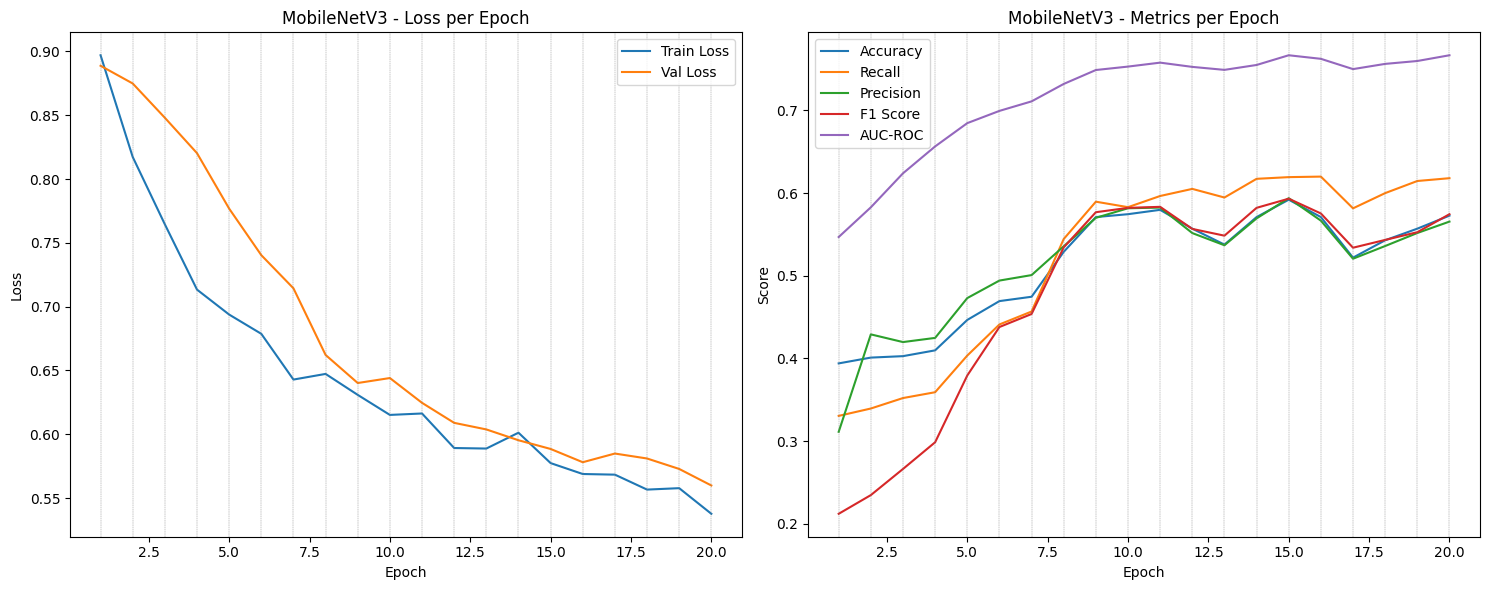

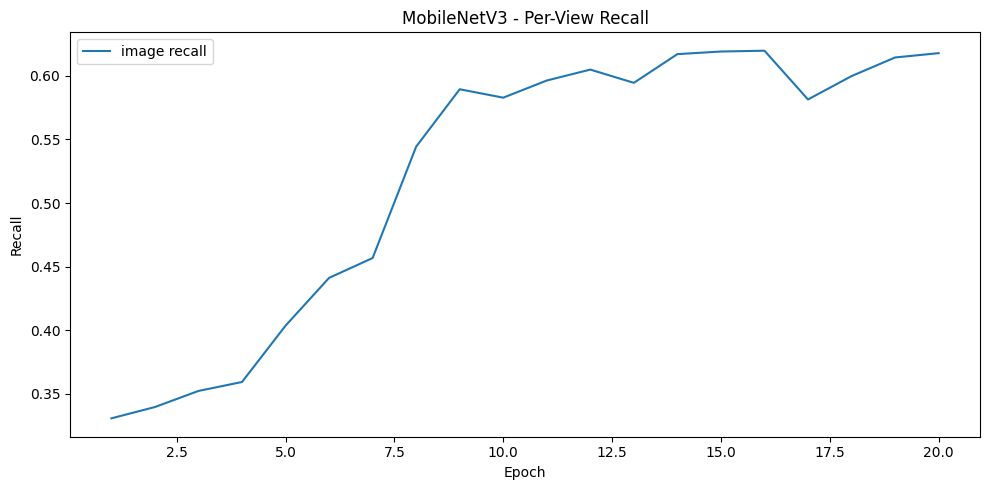

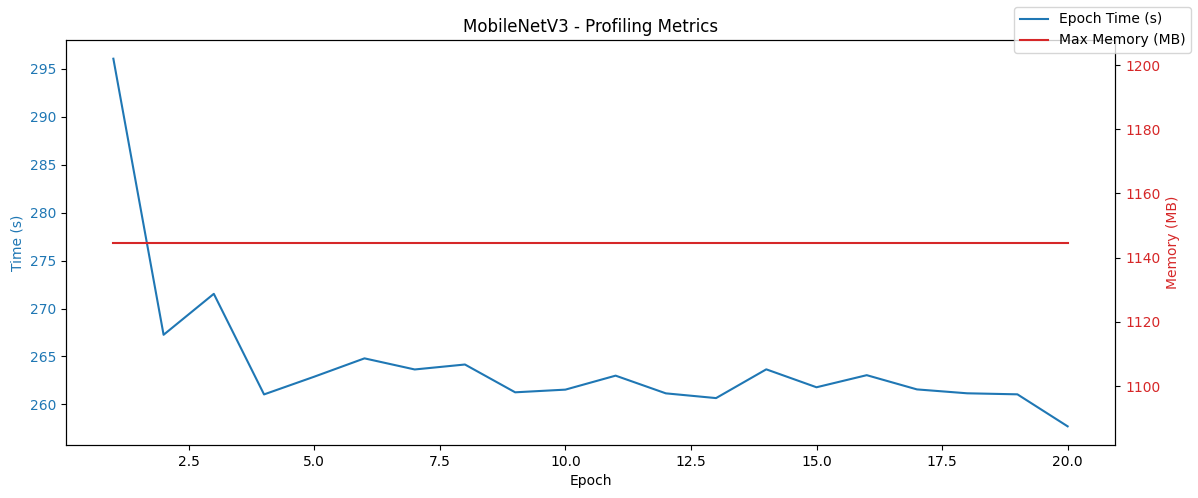

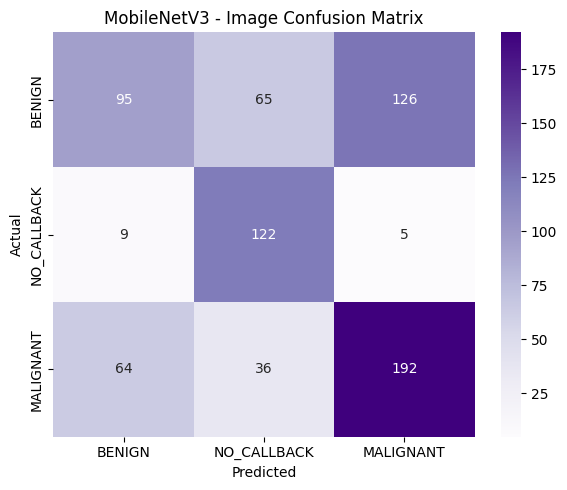

In [44]:
if SKIP_TRAINING:
    print(f"Skipping training for this run as SKIP_TRAINING is {SKIP_TRAINING}")
else:
    for model_name, strategy in strategies.items():
        print(f"\n==== Training {model_name} ====")
    
        if isinstance(strategy, BaseModel):
            config = strategy.config
            train_transform = strategy.get_transforms(train=True)
            eval_transform = strategy.get_transforms(train=False)
        else:
            config = None
            train_transform = eval_transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])
            ])
    
        train_dataset = CBISDDSMDataset("train.parquet", transform=train_transform, multi_view=False, images_base_path=IMAGES_ABS_PATH)
        val_dataset   = CBISDDSMDataset("val.parquet", transform=eval_transform, multi_view=False, images_base_path=IMAGES_ABS_PATH)
        test_dataset  = CBISDDSMDataset("test.parquet", transform=eval_transform, multi_view=False, images_base_path=IMAGES_ABS_PATH)
    
        train_loader = DataLoader(train_dataset, batch_size=70, shuffle=True, num_workers=8, pin_memory=True)
        val_loader   = DataLoader(val_dataset, batch_size=70, shuffle=False, num_workers=8, pin_memory=True)
        test_loader  = DataLoader(test_dataset, batch_size=70, shuffle=False, num_workers=8, pin_memory=True)

        run_dir = os.path.join(MODELS_OUTPUT_PATH, correlation_id)
        os.makedirs(run_dir, exist_ok=True)
    
        if isinstance(strategy, BaseModel):
            model = strategy.get_model().to(device)
            optimizer = Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
            scheduler = ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=config.scheduler_patience, min_lr=1e-6)
            criterion = FocalLoss(gamma=config.gamma, alpha=config.alpha)
            early_stopping = EarlyStopping(
                monitor="val_recall",
                mode="max",
                patience=config.early_stop_patience,
                delta=0.001
            )
    
            trainer = Trainer(
                model=model,
                device=device,
                optimizer=optimizer,
                criterion=criterion,
                scheduler=scheduler,
                early_stopping=early_stopping
            )
    
            trainer.fit(train_loader, val_loader, epochs=50)
    
            model_path = os.path.join(run_dir, f"{model_name.lower()}_{correlation_id}.pth")
            trainer.save_best_model(model_path)
            trainer.load_model(model_path)
    
            acc, loss, recall, precision, f1, auc, per_view_metrics, per_view_predictions, per_class_metrics = trainer.evaluate(test_loader)
    
            results.append({
                "model": model_name,
                "accuracy": acc,
                "recall": recall,
                "precision": precision,
                "f1_score": f1,
                "auc_roc": auc
            })
    
            for view, metrics in per_view_metrics.items():
                results.append({
                    "model": model_name,
                    "view": view,
                    "accuracy": metrics["accuracy"],
                    "recall": metrics["recall"],
                    "precision": metrics["precision"],
                    "f1_score": metrics["f1"],
                    "auc_roc": metrics["auc"]
                })

            for class_name, metrics in per_class_metrics.items():
                results.append({
                    "model": model_name,
                    "class": class_name,
                    "accuracy": metrics["accuracy"],
                    "recall": metrics["recall"],
                    "precision": metrics["precision"],
                    "f1_score": metrics["f1"],
                    "auc_roc": metrics["auc_roc"]
                })
    
            history_path = os.path.join(run_dir, f"{model_name.lower()}_{correlation_id}_history.csv")
            save_training_history_to_csv(trainer.get_history(), history_path)
            plot_training_history(trainer.get_history(), model_name=model_name)
    
            for view, pred_data in per_view_predictions.items():
                plot_confusion_matrix(
                    y_true=pred_data["y_true"],
                    y_pred=pred_data["y_pred"],
                    class_names=["BENIGN", "NO_CALLBACK", "MALIGNANT"],
                    title=f"{model_name} - {view.capitalize()} Confusion Matrix",
                    cmap=COLORMAPS.get(view.lower(), "Greys")
                )
    
            y_true, y_pred = [], []
            model.eval()
            with torch.no_grad():
                for images, labels in test_loader:
                    images = images.to(device)
                    preds = model(images).argmax(dim=1)
                    y_pred.extend(preds.cpu().numpy())
                    y_true.extend(labels.numpy())

            # Omitted for single view runs
            # plot_confusion_matrix(
            #     y_true=y_true,
            #     y_pred=y_pred,
            #     class_names=["BENIGN", "NO_CALLBACK", "MALIGNANT"],
            #     title=f"{model_name} - Overall Confusion Matrix",
            #     cmap="Blues"
            # )

            torch.cuda.empty_cache()
            del model
        elif isinstance(strategy, BaseClassifier): 
            strategy.fit(train_df)
        
            model_path = os.path.join(run_dir, f"{model_name.lower()}_{correlation_id}.pkl")
            strategy.save_model(model_path)
        
            strategy.load_model(model_path)
        
            # Evaluate on test and validation sets
            test_metrics = strategy.evaluate(test_df)
            val_metrics = strategy.evaluate(val_df)
            
            results.append({
                "model": model_name,
                "split": "test",
                "accuracy": test_metrics["accuracy"],
                "recall": test_metrics["recall"],
                "precision": test_metrics["precision"],
                "f1_score": test_metrics["f1_score"],
                "auc_roc": test_metrics["auc_roc"],
                "view": "image"
            })
            
            print(f"\n==== Evaluation for {model_name} ====")
            print("Validation:")
            for metric, value in val_metrics.items():
                print(f"{metric.capitalize()}: {value:.4f}")
            print("Test:")
            for metric, value in test_metrics.items():
                print(f"{metric.capitalize()}: {value:.4f}")

Saved results to /Users/clubability/Documents/GitHub/breast_cancer_detection/models/logs/3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7/summary_test_results_3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7.csv


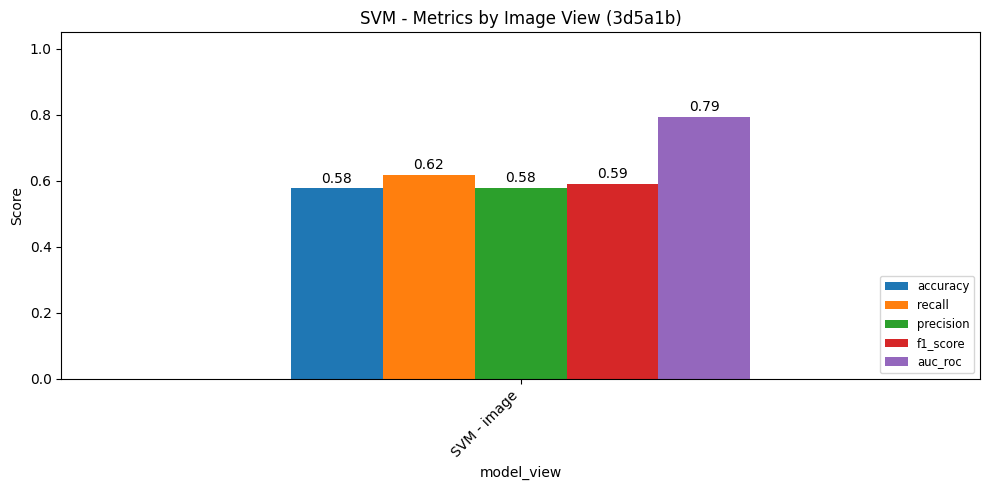

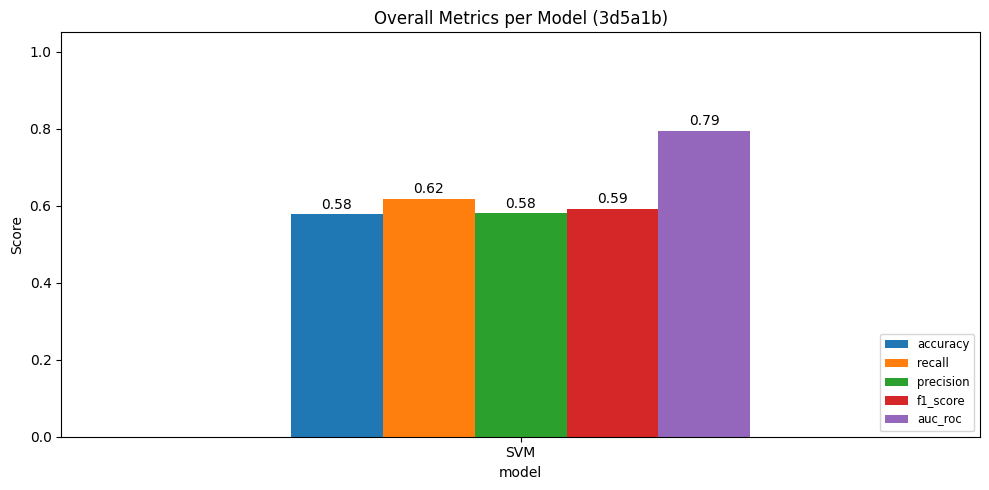

In [45]:
if SKIP_TRAINING:
    print(f"Skipping training for this run as SKIP_TRAINING is {SKIP_TRAINING}")
else:
    import pandas as pd
    import matplotlib.pyplot as plt
    import os

    results_df = pd.DataFrame(results)

    save_path = os.path.join(MODELS_LOGS_OUTPUT_PATH, correlation_id)
    os.makedirs(save_path, exist_ok=True)

    raw_path = os.path.join(save_path, f"summary_test_results_{correlation_id}.csv")
    results_df_rounded = results_df.round(4)
    results_df_rounded.to_csv(raw_path, index=False)
    print(f"Saved results to {raw_path}")

    # Fill default values for missing columns
    results_df["view"] = results_df.get("view", "global").fillna("global")
    results_df["class"] = results_df.get("class", pd.NA)

    # --- Plot: Per-View ---
    view_df = results_df[results_df["class"].isna()].copy()
    view_df["model_view"] = view_df["model"] + " - " + view_df["view"]
    view_df.set_index("model_view", inplace=True)

    for model in view_df["model"].unique():
        model_data = view_df[view_df["model"] == model]

        drop_cols = ["model", "view", "class"]
        title = f"{model} - Metrics by Image View ({correlation_id[:6]})"

        ax = model_data.drop(columns=drop_cols).plot(
            kind="bar",
            figsize=(10, 5),
            title=title
        )
        plt.ylabel("Score")
        plt.xticks(rotation=45, ha="right")
        plt.ylim(0, 1.05)
        plt.legend(loc="lower right", fontsize="small")
        plt.tight_layout()

        for container in ax.containers:
            ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)

        plot_path = os.path.join(save_path, f"{model.lower()}_per_view.png")
        plt.savefig(plot_path)
        print(f"Saved per-view plot to {plot_path}")
        plt.show()

    # --- Plot: Per-Class ---
    class_df = results_df[results_df["class"].notna()].copy()
    class_df["model_class"] = class_df["model"] + " - " + class_df["class"]
    class_df.set_index("model_class", inplace=True)

    for model in class_df["model"].unique():
        model_data = class_df[class_df["model"] == model]

        drop_cols = ["model", "view", "class"]
        title = f"{model} - Metrics by Class ({correlation_id[:6]})"

        ax = model_data.drop(columns=drop_cols).plot(
            kind="bar",
            figsize=(10, 5),
            title=title
        )
        plt.ylabel("Score")
        plt.xticks(rotation=45, ha="right")
        plt.ylim(0, 1.05)
        plt.legend(loc="lower right", fontsize="small")
        plt.tight_layout()

        for container in ax.containers:
            ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)

        plot_path = os.path.join(save_path, f"{model.lower()}_per_class.png")
        plt.savefig(plot_path)
        print(f"Saved per-class plot to {plot_path}")
        plt.show()

---
# Comparaci√≥n entre experimentos

Veamos el progreso entre nuestros experimentos.

In [46]:
if SKIP_TRAINING:
    print(f"Skipping training for this run as SKIP_TRAINING is {SKIP_TRAINING}")
else:
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    from datetime import datetime
    
    def plot_multiple_experiment_results(exp_ids: list[str], logs_path: str):
        all_results = []
    
        for exp_id in exp_ids:
            count = 0
            file_path = os.path.join(logs_path, f"summary_test_results_{exp_id}.csv")
    
            if not os.path.exists(file_path) and count==0:
                corr_logs_path = logs_path + '/' + exp_id + '/'
                file_path = os.path.join(corr_logs_path, f"summary_test_results_{exp_id}.csv")
                count += 1
                if not os.path.exists(file_path) and count==1:
                    print(f"File not found: {file_path}")
                    continue
    
            # Read file and creation date
            df = pd.read_csv(file_path)
            creation_time = os.path.getctime(file_path)
            creation_date = datetime.fromtimestamp(creation_time).strftime("%Y-%m-%d")

            print(file_path)

            print(df.columns)
            
            # Add experiment label
            experiment_label = f"{exp_id[:6]} ({creation_date})"
            df["experiment"] = experiment_label
            df["view"] = df["view"].fillna("global")
            all_results.append(df)
    
        if not all_results:
            print("No valid result files found.")
            return
    
        combined_df = pd.concat(all_results, ignore_index=True)
    
        metric_cols = ["accuracy", "recall", "precision", "f1_score"]
        view_order = ["global", "image", "cropped", "roi"]
    
        for model in combined_df["model"].unique():
            model_df = combined_df[combined_df["model"] == model].copy()
    
            for view in view_order:
                view_df = model_df[model_df["view"] == view].copy()
                if view_df.empty:
                    continue
    
                # Build DataFrame: index = experiment, columns = metric
                plot_df = view_df.set_index("experiment")[metric_cols]
    
                ax = plot_df.plot(kind="bar", figsize=(10, 5))
                plt.title(f"{model} - {view.capitalize()} Metrics per Experiment")
                plt.ylabel(view)
                plt.xticks(rotation=0)
                plt.ylim(0, 1.05)
                plt.legend(title="Metric", fontsize="small", loc="lower right")
                plt.tight_layout()
    
                for container in ax.containers:
                    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)
    
                plt.show()
    
    experiment_ids = ['a141fb95-3ae4-4039-b425-585c3aeeb646', correlation_id]
    plot_multiple_experiment_results(experiment_ids, MODELS_LOGS_OUTPUT_PATH)

File not found: /Users/clubability/Documents/GitHub/breast_cancer_detection/models/logs/summary_test_results_d93e0a9e-4d32-459f-81bf-9f0fb9ac156f.csv
File not found: /Users/clubability/Documents/GitHub/breast_cancer_detection/models/logs/summary_test_results_3d5a1ba6-a2bb-413d-bc90-e2b2c787c9c7.csv
No valid result files found.


# Inferencias

A continuaci√≥n, se cargan los modelos entrenados previamente para poder obtener predicciones sobre conjuntos de datos mediante el m√≥dilo de inferencias (Inference) implementado en el proyecto.

## Inferencia uno a uno

Se testea el m√≥dulo de inferencia usando el m√©todo que recibe una imagen como entrada.

In [51]:
model_name="ResNet50"

In [52]:
import os
import torch
from inference.cnn_predictor import CNNPredictor
from utils.dicom import load_image
from models.resnet import ResNetModel
from models.efficientnet import EfficientNetModel
from models.mobilenet import MobileNetModel


label_list = [label for label, idx in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
if not SKIP_TRAINING:
    model_path = os.path.join(run_dir, f"{model_name.lower()}_{correlation_id}.pth")
else:
    correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
    model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"resnet50_{correlation_id}.pth")

strategy = strategies[model_name]

predictor = CNNPredictor(strategy, model_path, label_list=label_list)

image_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009\1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992\1-1.dcm"
cropped_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942\1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515\1-1.dcm"
roi_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942\1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515\1-2.dcm"

mal_image_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-1.dcm"
mal_cropped_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-1.dcm"
mal_roi_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-2.dcm"

image = load_image(mal_image_path)

result = predictor.predict(image)
print(f"Predicted class: {result['prediction']}")
print(f"Confidence: {result['confidence']:.4f}")
print(f"Probabilities: {result['all_probs']}")

Predicted class: 2
Confidence: 0.8160
Probabilities: [0.182 0.003 0.816]


In [47]:
from inference.classifier_predictor import ClassifierPredictor

image_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009\1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992\1-1.dcm"
cropped_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942\1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515\1-1.dcm"
roi_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942\1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515\1-2.dcm"

mal_image_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-1.dcm"
mal_cropped_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-1.dcm"
mal_roi_path = r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-2.dcm"

# Load strategy and model
strategy = strategies["SVM"]

if not SKIP_TRAINING:
    model_path = os.path.join(run_dir, f"svm_{correlation_id}.pkl")
else:
    correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
    model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"svm_{correlation_id}.pkl")

predictor = ClassifierPredictor(strategy, model_path)

# Load image (PNG, JPG, or preprocessed DICOM)
image = load_image(image_path)

# Predict
result = predictor.predict(image)

print(f"Predicted class: {result['prediction']}")
print(f"Confidence: {result['confidence']:.4f}")
print(f"Probabilities: {result['all_probs']}")

FileNotFoundError: [Errno 2] No such file or directory: 'models/output/5d6e94d5-c3ef-46dd-913b-47101052a0f0/svm_5d6e94d5-c3ef-46dd-913b-47101052a0f0.pkl'

In [53]:
if ENABLE_CLASSIFIERS:
    from inference.classifier_predictor import ClassifierPredictor
    
    # Load strategy and model
    strategy = strategies["SVM"]
    
    if not SKIP_TRAINING:
        model_path = os.path.join(run_dir, f"svm_{correlation_id}.pkl")
    else:
        correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
        model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"svm_{correlation_id}.pkl")
    
    predictor = ClassifierPredictor(strategy, model_path)
    
    # Load image (PNG, JPG, or preprocessed DICOM)
    image = load_image(image_path)
    
    # Predict
    result = predictor.predict(image)
    
    print(f"Predicted class: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.4f}")
    print(f"Probabilities: {result['all_probs']}")
else:
    print("Classifiers disabled")

Classifiers disabled


In [54]:
if ENABLE_CLASSIFIERS:
    from inference.classifier_predictor import ClassifierPredictor
    
    # Load strategy and model
    strategy = strategies["XGBoost"]
    
    if not SKIP_TRAINING:
        model_path = os.path.join(run_dir, f"xgboost_{correlation_id}.pkl")
    else:
        correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
        model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"xgboost_{correlation_id}.pkl")
    
    predictor = ClassifierPredictor(strategy, model_path)
    
    # Load image (PNG, JPG, or preprocessed DICOM)
    image = load_image(image_path)
    
    # Predict
    result = predictor.predict(image)
    
    print(f"Predicted class: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.4f}")
    print(f"Probabilities: {result['all_probs']}")
else:
    print("Classifiers disabled")

Classifiers disabled


---

## Inferencia uno a uno (directorio)

Se testea el m√≥dulo de inferencia usando el m√©todo que recibe la direcci√≥n del archivo como entrada.

In [55]:
import os
from inference.cnn_predictor import CNNPredictor

label_list = [label for label, idx in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
strategy = strategies[model_name]

if not SKIP_TRAINING:
    model_path = os.path.join(run_dir, f"{model_name.lower()}_{correlation_id}.pth")
else:
    correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
    model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"resnet50_{correlation_id}.pth")

predictor = CNNPredictor(strategy, model_path, label_list=label_list)

benign_dict = {
    'image': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009\1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992\1-1.dcm",
    'cropped': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942\1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515\1-1.dcm",
    'roi': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942\1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515\1-2.dcm"
}

malignant_dict = {
    'image': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-1.dcm",
    'cropped': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-1.dcm",
    'roi': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-2.dcm"
}

for k, v in benign_dict.items():
    result = predictor.predict_from_path(v)
    print(f"[Benign {k}] Predicted: {result['prediction']} ({result['class_label']}) | Confidence: {result['confidence']:.2f}")

for k, v in malignant_dict.items():
    result = predictor.predict_from_path(v)
    print(f"[Malignant {k}] Predicted: {result['prediction']} ({result['class_label']}) | Confidence: {result['confidence']:.2f}")

[Benign image] Predicted: 1 (BENIGN_WITHOUT_CALLBACK) | Confidence: 0.47
[Benign cropped] Predicted: 0 (BENIGN) | Confidence: 0.39
[Benign roi] Predicted: 2 (MALIGNANT) | Confidence: 0.57
[Malignant image] Predicted: 2 (MALIGNANT) | Confidence: 0.82
[Malignant cropped] Predicted: 2 (MALIGNANT) | Confidence: 0.77
[Malignant roi] Predicted: 2 (MALIGNANT) | Confidence: 0.45


In [56]:
if ENABLE_CLASSIFIERS:
    import os
    from inference.classifier_predictor import ClassifierPredictor
    
    
    label_list = [label for label, idx in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
    strategy = strategies["SVM"]
    
    if not SKIP_TRAINING or not ENABLE_CLASSIFIERS:
        model_path = os.path.join(run_dir, f"svm_{correlation_id}.pkl")
    else:
        correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
        model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"svm_{correlation_id}.pkl")
    
    predictor = ClassifierPredictor(strategy, model_path, label_list)
    
    benign_dict = {
        'image': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009\1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992\1-1.dcm",
    }
    
    malignant_dict = {
        'image': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-1.dcm",
    }
    
    # Run predictions
    for k, v in benign_dict.items():
        result = predictor.predict_from_path(v)
        print(f"[Benign {k}] Predicted: {result['prediction']} ({result['class_label']}) | Confidence: {result['confidence']:.2f}")
    
    for k, v in malignant_dict.items():
        result = predictor.predict_from_path(v)
        print(f"[Malignant {k}] Predicted: {result['prediction']} ({result['class_label']}) | Confidence: {result['confidence']:.2f}")
else:
    print("Classifiers disabled")


Classifiers disabled


In [57]:
if ENABLE_CLASSIFIERS:
    import os
    from inference.classifier_predictor import ClassifierPredictor
    
    
    label_list = [label for label, idx in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
    strategy = strategies["XGBoost"]
    
    if not SKIP_TRAINING:
        model_path = os.path.join(run_dir, f"xgboost_{correlation_id}.pkl")
    else:
        correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0"
        model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"xgboost_{correlation_id}.pkl")
    
    predictor = ClassifierPredictor(strategy, model_path, label_list)
    
    benign_dict = {
        'image': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009\1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992\1-1.dcm",
    }
    
    malignant_dict = {
        'image': r"D:\TFM\breast_cancer_detection\data\CBIS-DDSM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-1.dcm",
    }
    
    # Run predictions
    for k, v in benign_dict.items():
        result = predictor.predict_from_path(v)
        print(f"[Benign {k}] Predicted: {result['prediction']} ({result['class_label']}) | Confidence: {result['confidence']:.2f}")
    
    for k, v in malignant_dict.items():
        result = predictor.predict_from_path(v)
        print(f"[Malignant {k}] Predicted: {result['prediction']} ({result['class_label']}) | Confidence: {result['confidence']:.2f}")
else:
    print("Classifiers disabled")

Classifiers disabled


---

## Inferencia por lotes (directorio)
Se testea el m√≥dulo de inferencia usando el m√©todo que recibe la direcci√≥n de una carpeta como entrada, ejecuntando la inferencia en el primer nivel del directorio.

In [58]:
import os
from inference.cnn_predictor import CNNPredictor

label_list = [label for label, idx in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
cnn_names = ["ResNet50", "EfficientNetB0", "MobileNetV3"]

for model_name in cnn_names:
    print(f"\n==== Bach inference for {model_name} ====")
    strategy = strategies[model_name]
    
    if not SKIP_TRAINING:
        model_path = os.path.join(run_dir, f"{model_name.lower()}_{correlation_id}.pth")
    else:
        correlation_id = "590cfd6e-cba8-48dd-a31e-d1bbca240247" # Known working experiment uuid
        model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"{model_name}_{correlation_id}.pth")
    
    predictor = CNNPredictor(strategy, model_path, label_list=label_list)
    
    external_studies_path = r"D:\TFM\breast_cancer_detection\data\inbreast_subset"
    
    results = predictor.predict_directory(
        dir_path=external_studies_path,
        correlation_id=correlation_id,
        output_path=INFERENCE_OUTPUT,
        output_file_name=f"{model_name}_inference.csv"
    )
    
    for r in results:
        print(f"{r['filename']}: {r['prediction']} ({r['class_label']}) ‚Äî {r['confidence']:.2f}")



==== Bach inference for ResNet50 ====
[INFO] Results saved to D:\TFM\breast_cancer_detection\output\5128832b-2804-41fd-bb29-19d51fdd8005\ResNet50_inference_20250610_190424.csv
22678622_61b13c59bcba149e_MG_R_CC_ANON.dcm: 0 (BENIGN) ‚Äî 0.56
22678670_61b13c59bcba149e_MG_R_ML_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.55
53581406_b231a8ba4dd4214f_MG_R_ML_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.55
53581460_b231a8ba4dd4214f_MG_R_CC_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.64

==== Bach inference for EfficientNetB0 ====
[INFO] Results saved to D:\TFM\breast_cancer_detection\output\5128832b-2804-41fd-bb29-19d51fdd8005\EfficientNetB0_inference_20250610_190425.csv
22678622_61b13c59bcba149e_MG_R_CC_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.54
22678670_61b13c59bcba149e_MG_R_ML_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.42
53581406_b231a8ba4dd4214f_MG_R_ML_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.68
53581460_b231a8ba4dd4214f_MG_R_CC_ANON.dcm: 1 (BENIGN_WITHOUT_CALLBACK) ‚Äî 0.60

==

In [59]:
if ENABLE_CLASSIFIERS:
    import os
    from inference.classifier_predictor import ClassifierPredictor
    
    label_list = [label for label, idx in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
    classifier_names = ["SVM", "XGBoost"]
    
    for model_name in classifier_names:
        print(f"\n==== Bach inference for {model_name} ====")
        strategy = strategies[model_name]
    
        if not SKIP_TRAINING:
            model_path = os.path.join(run_dir, f"svm_{correlation_id}.pkl")
        else:
            correlation_id = "5d6e94d5-c3ef-46dd-913b-47101052a0f0" # Known working experiment uuid
            model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"svm_{correlation_id}.pkl")
        
        predictor = ClassifierPredictor(strategy, model_path, label_list=label_list)
        
        external_studies_path = r"D:\TFM\breast_cancer_detection\data\busi_subset"
        
        results = predictor.predict_directory(
            dir_path=external_studies_path,
            correlation_id=correlation_id,
            output_path=INFERENCE_OUTPUT,
            output_file_name=f"{model_name}_inference.csv"
        )
        
        for r in results:
            print(f"{r['filename']}: {r['prediction']} ({r['class_label']}) ‚Äî {r['confidence']:.2f}")
else:
    print("Classifiers disabled")

Classifiers disabled


---

# Explicabilidad

En el siguiente apartado, se agrega explicabilidad a las predicciones realizadas por un modelo ya entrenado anteriormente con el fin de poder visualizar en qu√© areas de las im√°genes se centra un modelo para realizar una predicci√≥n.

In [60]:
model_name = "EfficientNetB0"

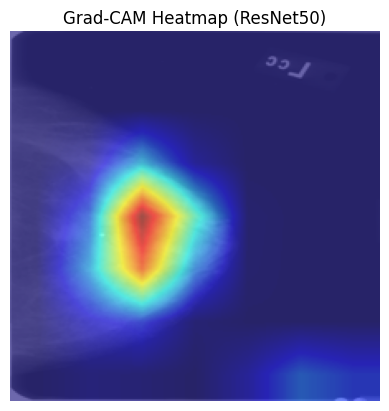

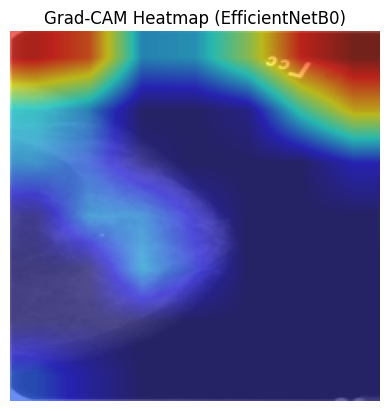

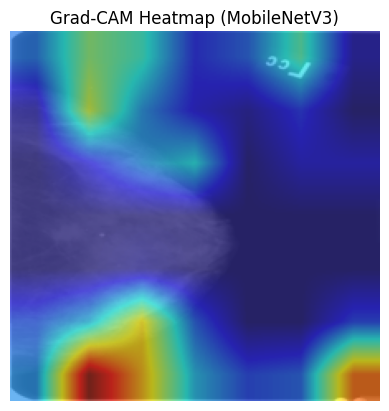

In [61]:
from inference.gradcam_explainer import GradCAMExplainer
import matplotlib.pyplot as plt

cnn_names = ["ResNet50", "EfficientNetB0", "MobileNetV3"]

for model_name in cnn_names:
    model_path = os.path.join(MODELS_OUTPUT_PATH, correlation_id, f"{model_name.lower()}_{correlation_id}.pth")
    strategy = strategies[model_name]
    predictor = CNNPredictor(strategy, model_path, label_list=label_list)
    
    explainer = GradCAMExplainer(predictor=predictor)
    
    image = load_image(mal_image_path)
    
    cam_image = explainer.explain(image)
    
    plt.imshow(cam_image)
    plt.axis('off')
    plt.title(f"Grad-CAM Heatmap ({model_name})")
    plt.show()